In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib notebook

In [2]:
df = pd.read_csv("PK COVID-19-3jun.csv")
df.drop("Travel_history",axis=1,inplace=True)
pro_dict= {"khyber Pakhtunkhwa":"Khyber Pakhtunkhwa","Gilgit-Baltistan":"Khyber Pakhtunkhwa",
           "Azad Jummu Kashmir":"Khyber Pakhtunkhwa","Islamabad Capital Territory":"Punjab",
          "Federal Administration Tribal Area":"Khyber Pakhtunkhwa","islamabad Capital Territory":"Punjab"}
df["Province"] = df["Province"].replace(pro_dict)
df["Date"] = pd.to_datetime(df["Date"])
df["Week"] = df["Date"].apply(lambda x : x.isocalendar()[1])
df["Week"] = df["Week"].array - 8

In [3]:
df.head()

,Date,Cases,Deaths,Recovered,Province,City,Week
0,2020-02-26,1,0,0,Punjab,Islamabad,1
1,2020-02-26,2,0,0,Sindh,Karachi,1
2,2020-02-29,1,0,0,Punjab,Islamabad,1
3,2020-02-29,1,0,0,Sindh,Karachi,1
4,2020-03-02,1,0,0,Khyber Pakhtunkhwa,Gilgit,2


In [7]:
total_cases = pd.Series()
total_recovered = pd.Series()

for pov_name in df["Province"].unique():
#     print(pov_name)
    ser_1 = df[df["Province"] == pov_name]["Cases"].cumsum()
    ser_2 = df[df["Province"] == pov_name]["Recovered"].cumsum()
    
    total_cases = total_cases.append(ser_1)
    total_recovered = total_recovered.append(ser_2)

df["Total Cases"] = total_cases.sort_index()
df["Total Recovered"] = total_recovered.sort_index()
df["pct"] = (df["Total Recovered"]/df["Total Cases"]) * 100

f:\software_installations\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
f:\software_installations\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [8]:
vals = []
dates_pct = []
ps = ['Punjab', 'Sindh', 'Khyber Pakhtunkhwa', 'Baluchistan']
for i in df.groupby("Date"):
    d = i[1]
    v1 = d[d["Province"] == ps[0]]['pct'].mean()
    v2 = d[d["Province"] == ps[1]]['pct'].mean()
    v3 = d[d["Province"] == ps[2]]['pct'].mean()
    v4 = d[d["Province"] == ps[3]]['pct'].mean()
    vals = pd.Series([v1,v2,v3,v4]).fillna(0).to_list()
    vals.insert(0,i[0])
    dates_pct.append(vals)


In [9]:
dff = pd.DataFrame(dates_pct,columns=['Date','Punjab', 'Sindh', 'Khyber Pakhtunkhwa', 'Baluchistan'])

In [22]:
n = 90

def update_2(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    # clearing the current axis
    plt.cla()
    v = dff.loc[curr]
    
    date = v["Date"]
    
    plt.gca().set_title('Covid-19 Recovery Rate of Provinces of Pakistan (1 - 15 Weeks)',fontsize=18)
    plt.gca().set_ylabel('Recovery Rate (%)',fontsize=14)
    
    vs = [v["Punjab"],v["Khyber Pakhtunkhwa"],v["Sindh"],v["Baluchistan"]]
    b_list = plt.bar(["Punjab","Khyber Pakhtunkhwa","Sindh","Baluchistan"],[vs[0],vs[1],vs[2],vs[3]])
    b_list[0].set_color("midnightblue")
    b_list[1].set_color("darkslategrey")
    b_list[2].set_color("purple")
    b_list[3].set_color("darkred")
    
    for idx,rect in enumerate(b_list):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, 1.05*height,"{}%".format(round(vs[idx],2)),
                 ha='center', va='bottom',size=12)
    
    plt.axis([-1,4,0,80])
    plt.xticks(weight = 'bold',fontsize=12)
    plt.text(2.45, 72, 'Week {} of Covid-19'.format(date.isocalendar()[1]-8),size=15,
             color='black', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

<IPython.core.display.Javascript object>


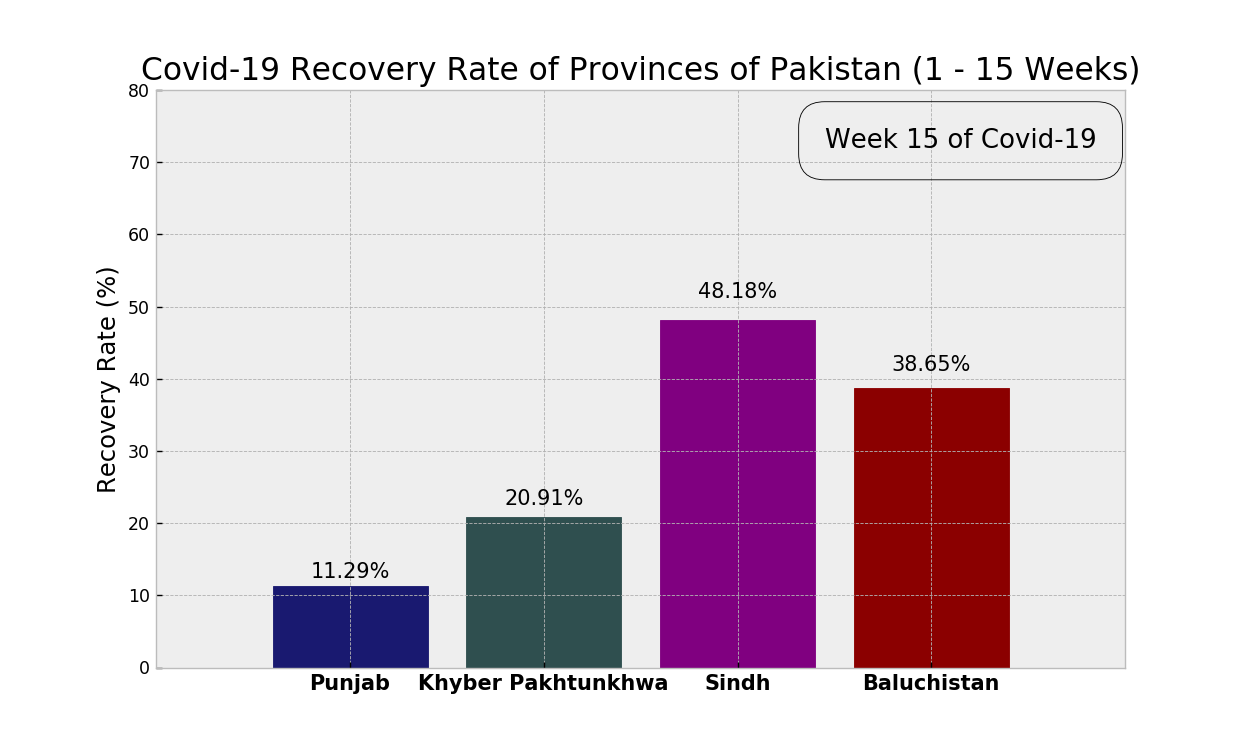

In [23]:
import time
time.sleep(2)
plt.style.use("bmh")
fig = plt.figure(figsize=(10,6))
a = animation.FuncAnimation(fig, update_2, interval=400)